In [11]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import string
from matplotlib import gridspec
import re

import time
import pickle

import memory_profiler

%load_ext memory_profiler

from pathlib import Path

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [12]:
mpl.__version__

'3.8.2'

In [13]:
import black
import jupyter_black

jupyter_black.load(line_length=79)

In [14]:
%load_ext autoreload
%autoreload 2

from pubmed_landscape_src.plotting import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
variables_path = Path("../../results/variables/2024_baseline")
figures_path = Path("../../results/figures/final")
berenslab_data_path = Path("/gpfs01/berens/data/data/pubmed_processed")

In [16]:
plt.style.use("../matplotlib_style.txt")

# Fig S10: Updated embedding colored by country 

## Import

### (a)

In [17]:
tsne = np.load(variables_path / "tsne_bert_sep.npy")

In [18]:
tsne_rot = np.vstack((-tsne[:, 1], -tsne[:, 0])).T

In [19]:
# load
countries_first_author_2024_usa_corrected = np.load(
    variables_path / "countries_first_author_2024_usa_corrected.npy"
)
colors_countries_first_author_2024_usa_corrected_with_black = np.load(
    variables_path
    / "colors_countries_first_author_2024_usa_corrected_with_black.npy",
    allow_pickle=True,
)

In [20]:
# legend colors
pickle_in = open(variables_path / "colors_countries_legend_2024.pkl", "rb")
colors_countries_legend_2024 = pickle.load(pickle_in)

### (b)

In [21]:
# save
counts_countries_corrected = np.load(
    variables_path / "counts_countries_corrected.npy"
)
counts_missing_countries_corrected = np.load(
    variables_path / "counts_missing_countries_corrected.npy"
)
counts_missing_affil = np.load(variables_path / "counts_missing_affil.npy")

## Plot

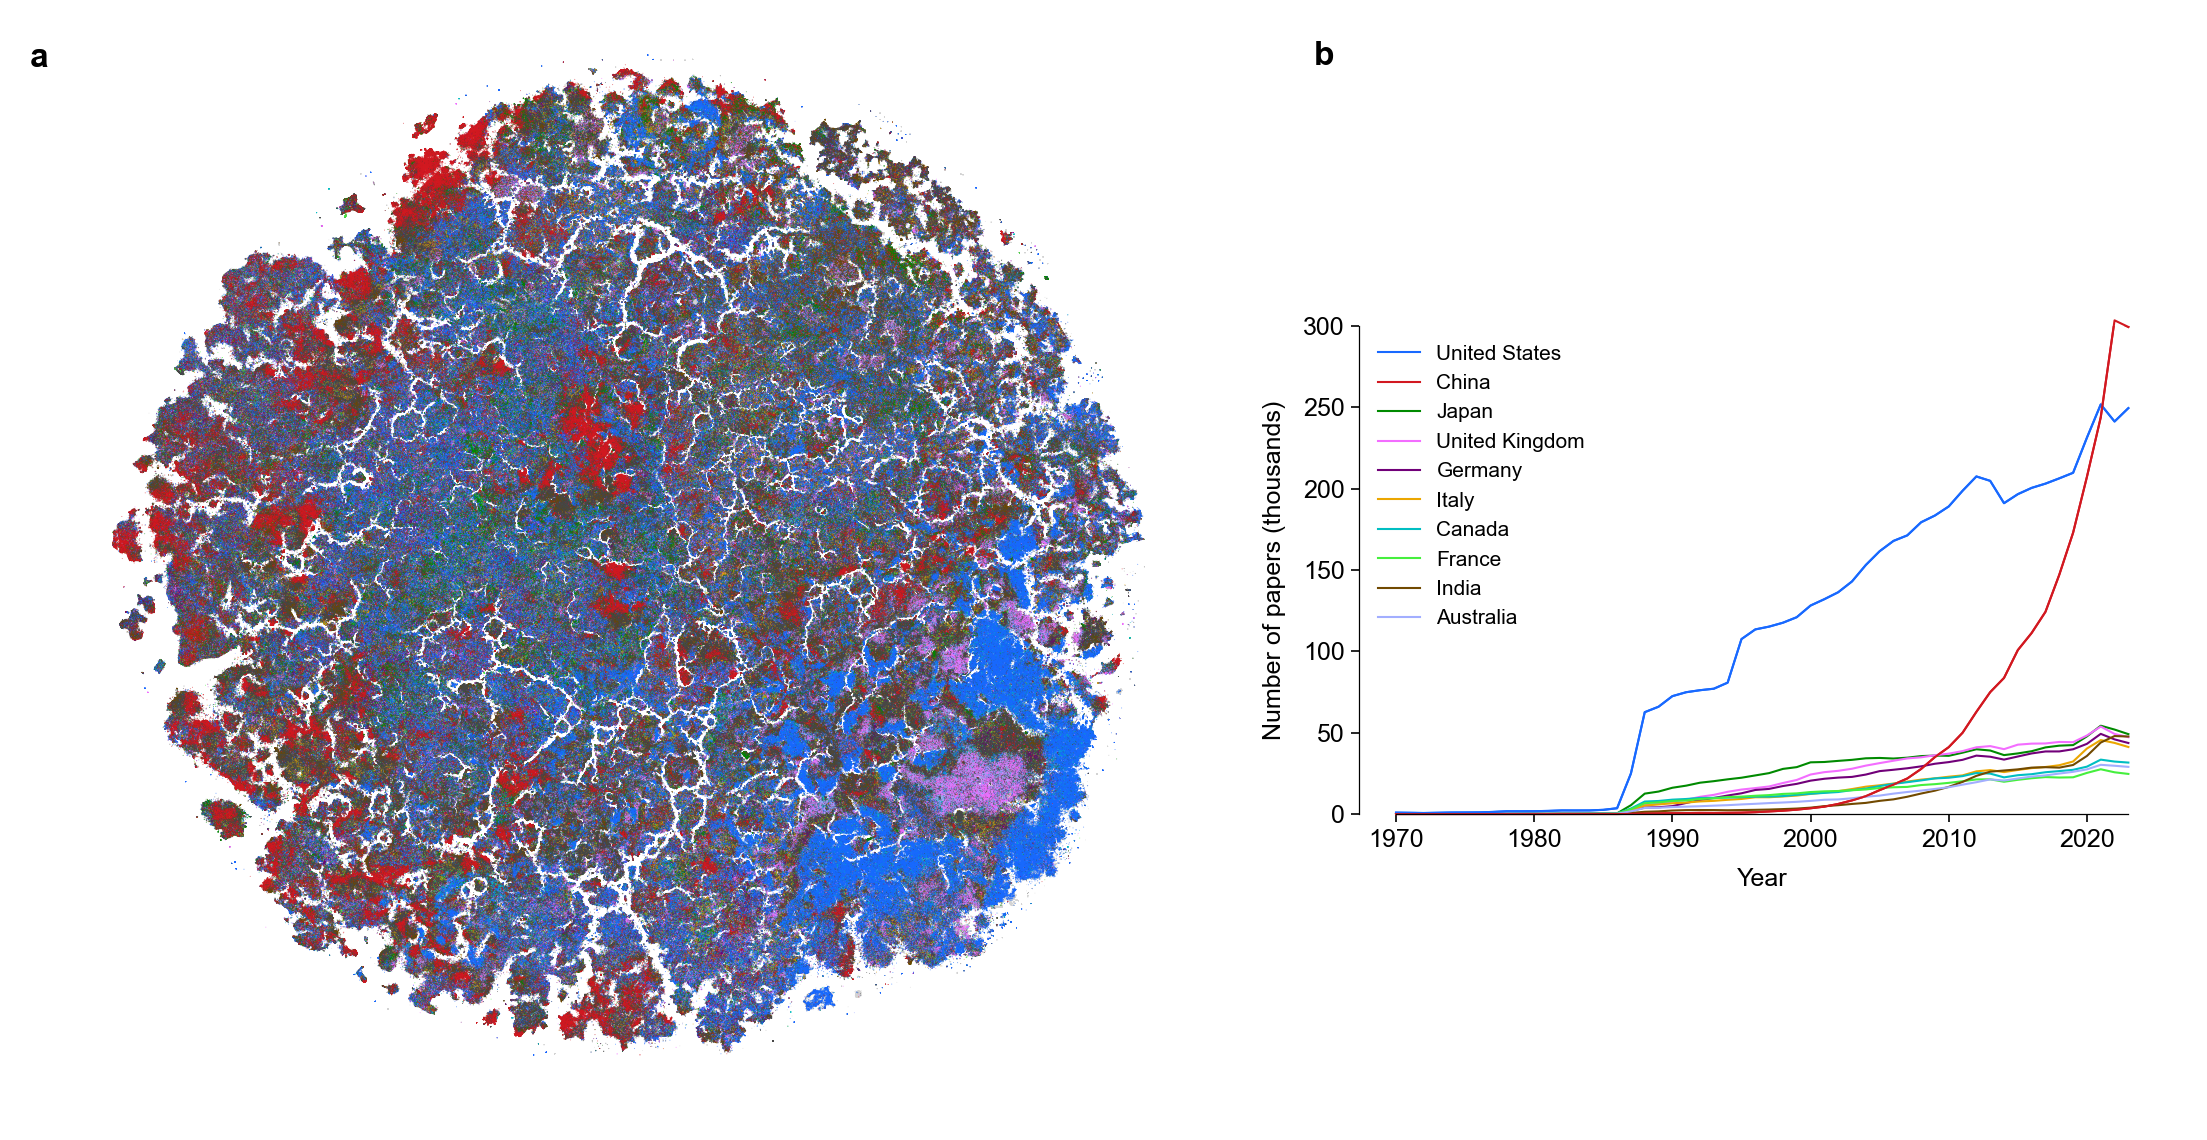

In [57]:
%matplotlib inline

fig, ax = plt.subplots(
    1,
    2,
    figsize=(7.2, 3.6),
    dpi=300,
    layout="constrained",
    width_ratios=[0.6, 0.4],
)

txtkwargs = dict(size=8, weight="bold", va="top", ha="left")

x_lim = (-230, 230)
y_lim = (-230, 230)


# subplot a
plot_tsne_colors(
    tsne_rot,
    colors_countries_first_author_2024_usa_corrected_with_black,
    x_lim=x_lim,
    y_lim=y_lim,
    ax=ax[0],
    plot_type="subplot_2",
)

all_keys = []
for key, value in colors_countries_legend_2024.items():
    key = ax[0].scatter([], [], c=value, s=10, alpha=1, label=key)
    all_keys.append(key)

key = ax[0].scatter([], [], c="#474747", s=10, alpha=1, label="Others")
all_keys.append(key)


ax[0].text(
    0, 1, string.ascii_lowercase[0], transform=ax[0].transAxes, **txtkwargs
)


# subplot b
n = 10
years = np.arange(1970, 2025)
ax[1].set_aspect((53 / 300e3) * (2 / 3))
for i, country in enumerate(list(colors_countries_legend_2024.keys())):
    ax[1].plot(
        years[:-1],
        counts_countries_corrected[i, :-1],
        ms=1,
        color=colors_countries_legend_2024[country],
        label=country,
    )

ax[1].plot(
    years[:-1],
    counts_countries_corrected[0, :-1],
    ms=1,
    color=colors_countries_legend_2024["United States"],
)
ax[1].plot(
    years[:-1],
    counts_countries_corrected[1, :-1],
    ms=1,
    color=colors_countries_legend_2024["China"],
    clip_on=False,
)



ax[1].set_xlabel("Year")
ax[1].set_ylabel("Number of papers (thousands)")
ax[1].legend(loc="upper left", fontsize=5)
ax[1].set_yticks(np.arange(0, 350, 50) * 1e3)
ax[1].set_yticklabels(np.arange(0, 350, 50))
ax[1].set_ylim(0, 300e3)
ax[1].spines.bottom.set_bounds(1970, 2023)


axs1_title = fig.add_axes([0.5, 0, 0.5, 1])  # left, bottom, width, height

axs1_title.text(
    0.2,
    0.99,
    string.ascii_lowercase[1],
    transform=axs1_title.transAxes,
    **txtkwargs,
)
axs1_title.axis("off")


fig.savefig(
    figures_path / "fig_tsne_and_number_of_papers_by_country_v5.png", dpi=300
)
fig.savefig(
    figures_path / "fig_tsne_and_number_of_papers_by_country_v5.pdf", dpi=300
)

## Numbers

In [ ]:
# load
date_year_2024 = np.load(variables_path / "date_year_2024.npy")

In [65]:
print(counts_countries_corrected[1, :][years == 2000])
print(
    counts_countries_corrected[1, :][years == 2000]
    / np.sum(date_year_2024 == 2000)
    * 100
)
print(counts_countries_corrected[1, :][years == 2022])
print(
    counts_countries_corrected[1, :][years == 2022]
    / np.sum(date_year_2024 == 2022)
    * 100
)

[3596.]
[0.99003631]
[303397.]
[22.14749619]
